In [1]:
!pip install scikit-learn matplotlib


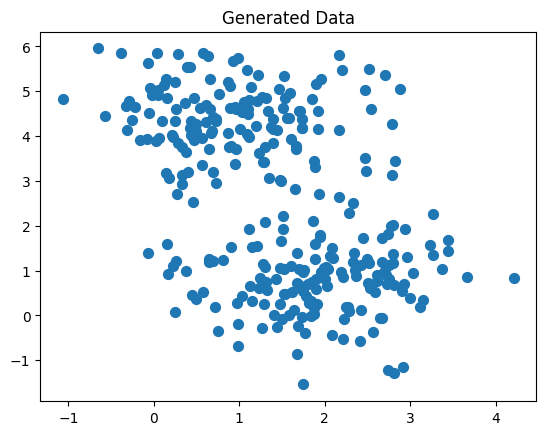

In [59]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generating synthetic data
X, y_true = make_blobs(n_samples=300, centers=2, cluster_std=0.8, random_state=0)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


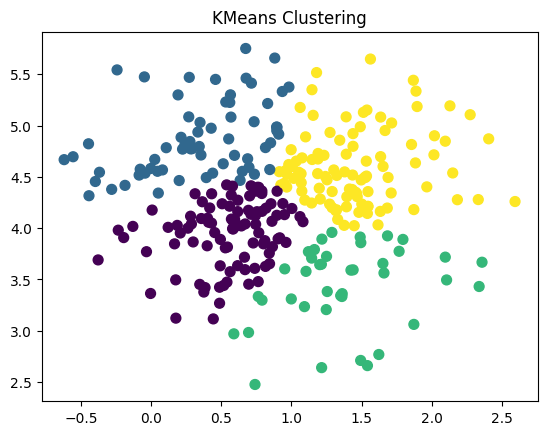

In [48]:
from sklearn.cluster import KMeans

# Applying KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting KMeans result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()


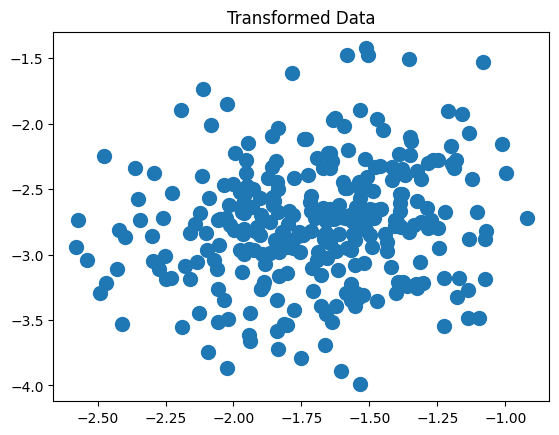

In [49]:
# Transform the data to make its distribution more complex
from sklearn.preprocessing import StandardScaler
import numpy as np

X_new = np.dot(X, np.random.RandomState(140).randn(2,7))

# Plotting the transformed data
plt.scatter(X_new[:, 0], X_new[:, 1], s=100)
plt.title("Transformed Data")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


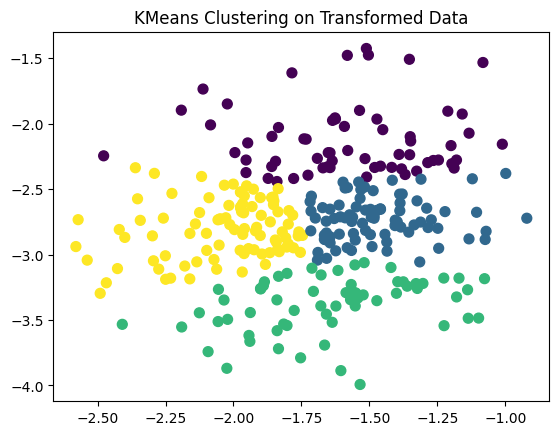

In [50]:
# Applying KMeans to the transformed data
kmeans_new = KMeans(n_clusters=4)
kmeans_new.fit(X_new)
y_kmeans_new = kmeans_new.predict(X_new)

# Plotting KMeans result on transformed data
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans_new, s=50, cmap='viridis')
plt.title("KMeans Clustering on Transformed Data")
plt.show()


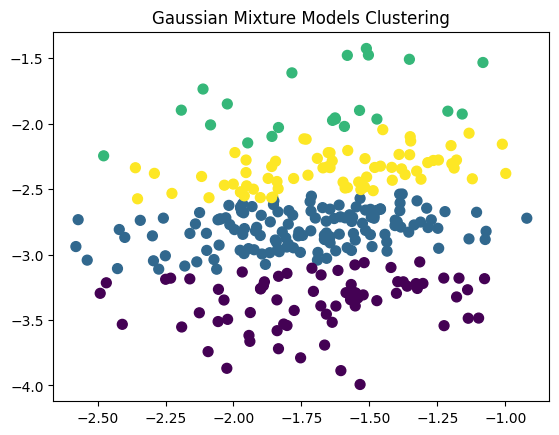

In [51]:
from sklearn.mixture import GaussianMixture

# Applying GMM
gmm = GaussianMixture(n_components=4)
gmm.fit(X_new)
y_gmm = gmm.predict(X_new)

# Plotting GMM result
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title("Gaussian Mixture Models Clustering")
plt.show()


In [60]:
from sklearn.metrics import silhouette_score

# Evaluating KMeans
kmeans_silhouette = silhouette_score(X_new, y_kmeans)

# Evaluating GMM
gmm_silhouette = silhouette_score(X_new, y_gmm)

print("KMeans Silhouette Score: ", kmeans_silhouette)
print("GMM Silhouette Score: ", gmm_silhouette)


KMeans Silhouette Score:  0.33382747259174506
GMM Silhouette Score:  0.32710425631953216


In [54]:
# Silhouette score for KMeans on transformed data
kmeans_new_silhouette = silhouette_score(X_new, y_kmeans_new)

# Silhouette score for GMM on transformed data
gmm_new_silhouette = silhouette_score(X_new, y_gmm)

print("KMeans Silhouette Score on Transformed Data: ", kmeans_new_silhouette)
print("GMM Silhouette Score on Transformed Data: ", gmm_new_silhouette)


KMeans Silhouette Score on Transformed Data:  0.35290539507752355
GMM Silhouette Score on Transformed Data:  0.32710425631953216


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


In [92]:
# Generate circular clusters
X1, y1 = make_blobs(n_samples=300, centers=3, cluster_std=0.9, random_state=0)

# Generate elongated clusters
random_state = np.random.RandomState(170)
X2, _ = make_blobs(n_samples=300, centers=9, cluster_std=0.9, random_state=0)
transformation = random_state.normal(size=(2, 2))
X2 = np.dot(X2, transformation)

# Combine the datasets
X = np.vstack((X1, X2))
y = np.hstack((y1, np.full(X2.shape[0], 2)))  # Label '2' for elongated clusters


In [99]:
# KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# GMM
gmm = GaussianMixture(n_components=10, random_state=0)
y_gmm = gmm.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


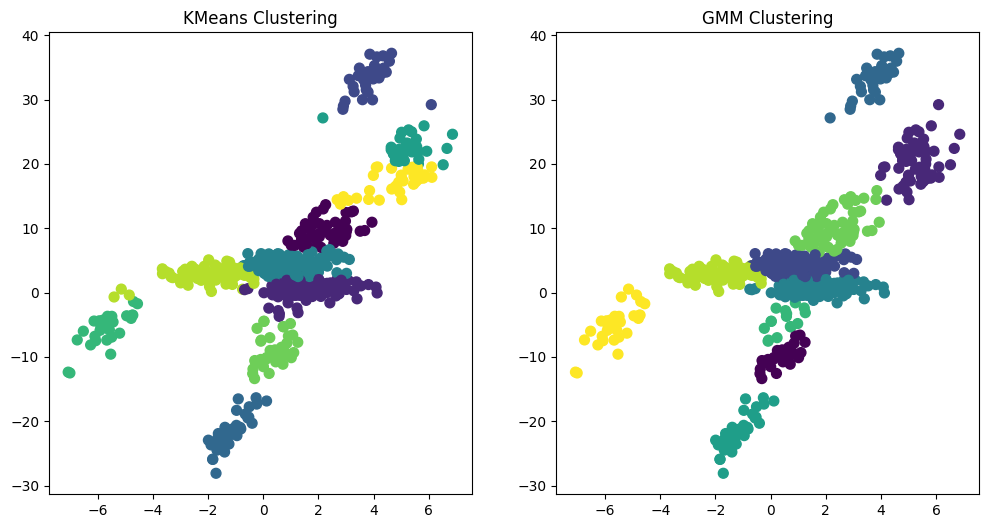

In [100]:
plt.figure(figsize=(12, 6))

# KMeans Clustering
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title("KMeans Clustering")

# GMM Clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=50)
plt.title("GMM Clustering")

plt.show()


In [101]:
# Silhouette scores
silhouette_kmeans = silhouette_score(X, y_kmeans)
silhouette_gmm = silhouette_score(X, y_gmm)

print(f"KMeans Silhouette Score: {silhouette_kmeans:.2f}")
print(f"GMM Silhouette Score: {silhouette_gmm:.2f}")


KMeans Silhouette Score: 0.53
GMM Silhouette Score: 0.53
